## F770W - Stephans Quintet - col/row pull up down cleaning

Author: Karl Gordon

Last modified: 3 Aug 2022

### Variables controling processing and display

In [13]:
filter = "F770W"
fwhm = 2.2
exclude_above = None
ds9point = "rowcol_points.reg"

crval = [338.9982251241355, 33.95839892526284]
# rotation = 63.0
# crval = None
rotation = None

tweakreg = False
align_to_gaia = False

matchbkg = False

# display range for images
drange_cal = [-0.1, 5.0]
dmap = "afmhot"  # same as ds9 bb

run_cc_image3 = True

In [14]:
import os
import glob
import copy

from astropy.io import ascii, fits
from astropy.visualization import simple_norm

In [15]:
import astropy
print(astropy.__version__)

5.0.4
5.0.4


In [16]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds-pub.stsci.edu"

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [18]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image
from helpers.miri_clean import make_sky, fix_rowcol_pull_updown
from helpers.miri_helpers import miri_image3

In [19]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d
1.6.2.dev4+g35d5e1d


### Clean col/row pull up/down if desired

In [20]:
if ds9point is not None:
    miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_wcs_skysub_cal.fits")
    for cfile in miri_cal_files:
        fix_rowcol_pull_updown(cfile, ds9point, xwidth=40, ywidth=40, xoffset=100, yoffset=100, cortype=None)  # ["topbotright"])

on image ./F770W/stage2/jw02732002002_02101_00003_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00003_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00007_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00007_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00004_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00004_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00006_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00006_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00001_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00001_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00002_mirimage_fixed_wcs_skysub_cal.fits
on image ./F770W/stage2/jw02732002002_02101_00002_mirimage_fixed_

### rerun CALWEBB_IMAGE3 with the new cleaned files

In [21]:
if run_cc_image3:
    miri_cccal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_wcs_skysub_cal_colrow.fits")
    output_dir = f"./{filter}/stage3/"
    print(miri_cccal_files)

    if rotation is not None:
        miri_asn_name = f'miri_{filter}_stage3_nirproj_asn_skysub_colrow'
    else: 
        miri_asn_name = f'miri_{filter}_stage3_asn_skysub_colrow'
    miri_asn = asn_from_list.asn_from_list(miri_cccal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

    miri_asn_file = f'{miri_asn_name}.json'
    with open(miri_asn_file, 'w') as outfile:
        name, serialized = miri_asn.dump(format='json')
        outfile.write(serialized)

['./F770W/stage2/jw02732002001_02101_00008_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732006002_02101_00008_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732002002_02101_00007_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732006001_02101_00004_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732006001_02101_00002_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732002002_02101_00006_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732002002_02101_00003_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732006002_02101_00006_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732002001_02101_00005_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732002001_02101_00001_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732006002_02101_00005_mirimage_fixed_wcs_skysub_cal_colrow.fits', './F770W/stage2/jw02732006001_02101_00006_mirimage_fi

In [22]:
if run_cc_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg,
                crval=crval, rotation=rotation,
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-08-03 14:16:35,908 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-08-03 14:16:35,908 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-08-03 14:16:35,909 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-03 14:16:35,909 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-03 14:16:35,910 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-08-03 14:16:35,910 - stpipe.Image3Pipeline.assi

2022-08-03 14:16:35,926 - stpipe.Image3Pipeline.source_catalog - INFO - SourceCatalogStep instance created.
2022-08-03 14:16:36,348 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline running with args ('miri_F770W_stage3_asn_skysub_colrow.json',).
2022-08-03 14:16:36,348 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline running with args ('miri_F770W_stage3_asn_skysub_colrow.json',).
2022-08-03 14:16:36,358 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage3/', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'steps': {'assign_mtwcs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_o

2022-08-03 14:16:36,697 - stpipe.Image3Pipeline - INFO - Prefetch for APCORR reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_apcorr_0008.fits'.
2022-08-03 14:16:36,698 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:16:36,698 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 14:16:36,700 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-08-03 14:16:36,700 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-08-03 14:16:46,624 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-08-03 14:16:46,624 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-08-03 14:16:46,626 - stpipe.Image3Pipeline.tweakreg - INFO - Step 

2022-08-03 14:16:57,819 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-08-03 14:16:57,819 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-08-03 14:16:59,018 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-08-03 14:16:59,018 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-08-03 14:17:00,144 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-08-03 14:17:00,144 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-08-03 14:17:01,383 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-08-03 14:17:01,383 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1977, 2384)
2022-08-03 14:17:02,535 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizz

2022-08-03 14:17:48,863 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1977, 2384)
2022-08-03 14:17:48,863 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1977, 2384)
2022-08-03 14:17:49,675 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1977, 2384)
2022-08-03 14:17:49,675 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1977, 2384)
2022-08-03 14:17:50,552 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1977, 2384)
2022-08-03 14:17:50,552 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1977, 2384)
2022-08-03 14:17:51,458 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1977, 2384)
2022-08-03 14:17:51,458 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1977, 2384)
2022-08-03 14:17:52,360 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (102

2022-08-03 14:18:10,235 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 301 (0.03%)
2022-08-03 14:18:10,235 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 301 (0.03%)
2022-08-03 14:18:10,329 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 351 (0.03%)
2022-08-03 14:18:10,329 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 351 (0.03%)
2022-08-03 14:18:10,423 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 338 (0.03%)
2022-08-03 14:18:10,423 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 338 (0.03%)
2022-08-03 14:18:10,521 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 251 (0.02%)
2022-08-03 14:18:10,521 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 251 (0.02%)
2022-08-03 14:18:10,614 - stpipe.Image3Pipeline.

2022-08-03 14:18:24,866 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006002_02101_00005_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-08-03 14:18:25,930 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006001_02101_00006_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-08-03 14:18:25,930 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006001_02101_00006_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-08-03 14:18:27,320 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006001_02101_00003_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-08-03 14:18:27,320 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006001_02101_00003_mirimage_fixed_wcs_skysub_cal_colrow_a3001_crf.fits
2022-08-03 14:18:28,365 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved mode

2022-08-03 14:18:48,662 - stpipe.Image3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).
2022-08-03 14:18:48,664 - stpipe.Image3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': [338.9982251241355, 33.95839892526284], 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': 0.11, 'single': False, 'blendheaders': True, 'allowed_memory': None}
2022-08-03 14:18:48,664 - stpipe.Image3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index'

2022-08-03 14:19:21,900 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:19:22,915 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:19:22,915 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:19:23,897 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:19:23,897 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:19:24,898 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:19:24,898 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:19:25,233 - stpipe.Image3Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 14:19:25,233 - stpipe.Image3Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 14:19:25,880 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024,

2022-08-03 14:20:03,908 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:04,911 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:04,911 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:05,868 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:05,868 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:06,814 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:06,814 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:07,826 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:07,826 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:08,813 - stpipe.Image3Pipelin

2022-08-03 14:20:45,347 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:46,680 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:46,680 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:47,945 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:47,945 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:49,412 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:49,412 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:50,459 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:50,459 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1994, 2404)
2022-08-03 14:20:51,523 - stpipe.Image3Pipelin

2022-08-03 14:21:13,662 - stpipe.Image3Pipeline.source_catalog - INFO - Instrument: MIRI
2022-08-03 14:21:13,662 - stpipe.Image3Pipeline.source_catalog - INFO - Instrument: MIRI
2022-08-03 14:21:13,663 - stpipe.Image3Pipeline.source_catalog - INFO - Detector: MIRIMAGE
2022-08-03 14:21:13,663 - stpipe.Image3Pipeline.source_catalog - INFO - Detector: MIRIMAGE
2022-08-03 14:21:13,663 - stpipe.Image3Pipeline.source_catalog - INFO - Filter: F770W
2022-08-03 14:21:13,663 - stpipe.Image3Pipeline.source_catalog - INFO - Filter: F770W
2022-08-03 14:21:13,663 - stpipe.Image3Pipeline.source_catalog - INFO - Subarray: FULL
2022-08-03 14:21:13,663 - stpipe.Image3Pipeline.source_catalog - INFO - Subarray: FULL
2022-08-03 14:21:13,724 - stpipe.Image3Pipeline.source_catalog - INFO - AB to Vega magnitude offset 4.38398
2022-08-03 14:21:13,724 - stpipe.Image3Pipeline.source_catalog - INFO - AB to Vega magnitude offset 4.38398
2022-08-03 14:21:13,910 - stpipe.Image3Pipeline.source_catalog - INFO - Backgr

In [23]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_mosaic = datamodels.open(miri_mosaic_file)

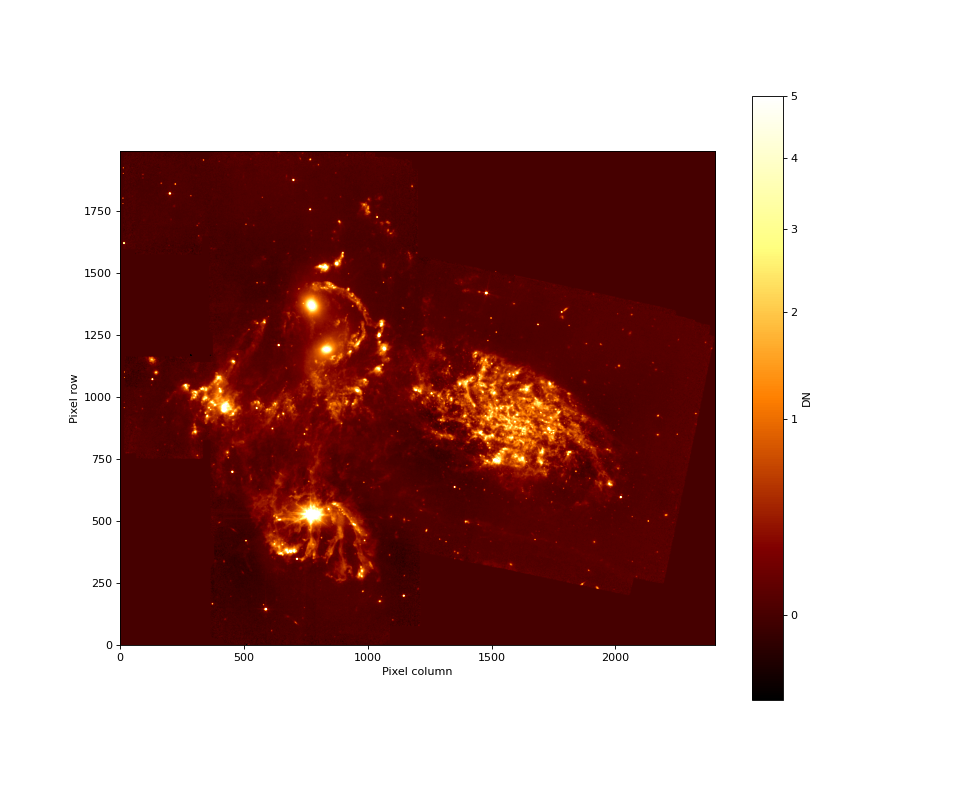

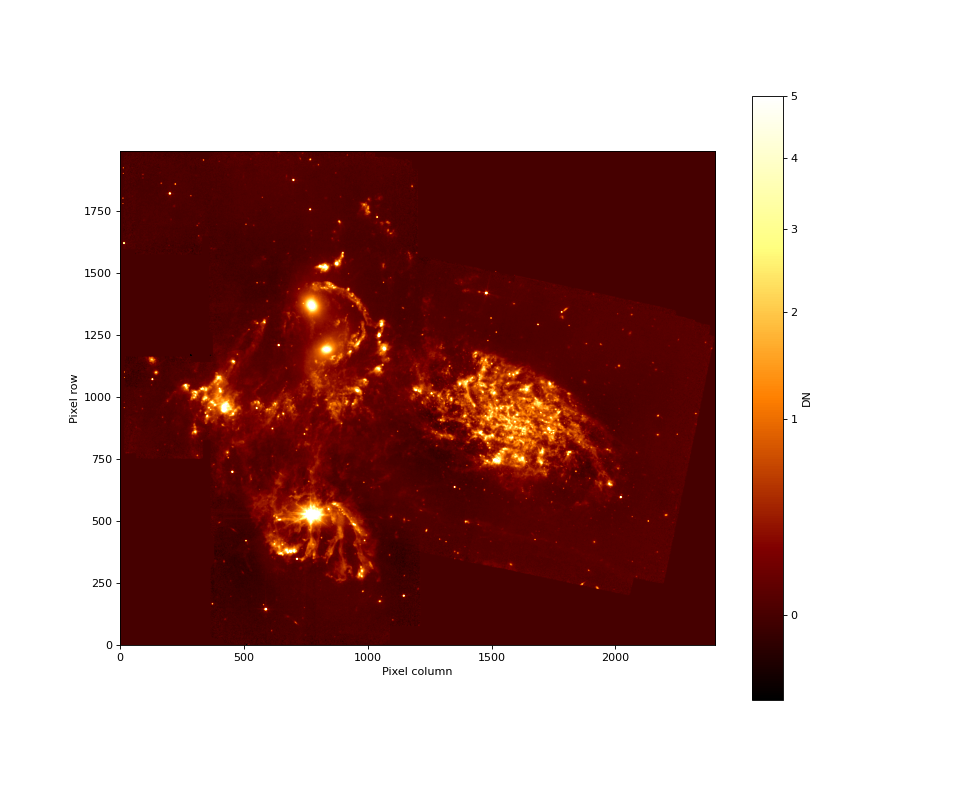

In [24]:
drange = drange_cal
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)